In [1]:
import pandas as pd
import numpy as np
import math
import sklearn.metrics 
import time
from datetime import date
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import skew


In [2]:
data_raw=pd.read_csv("AmesHousing.csv",  delimiter=',')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
data_raw.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
data_raw.shape

(2930, 82)

In [5]:
data_raw.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

<Axes: >

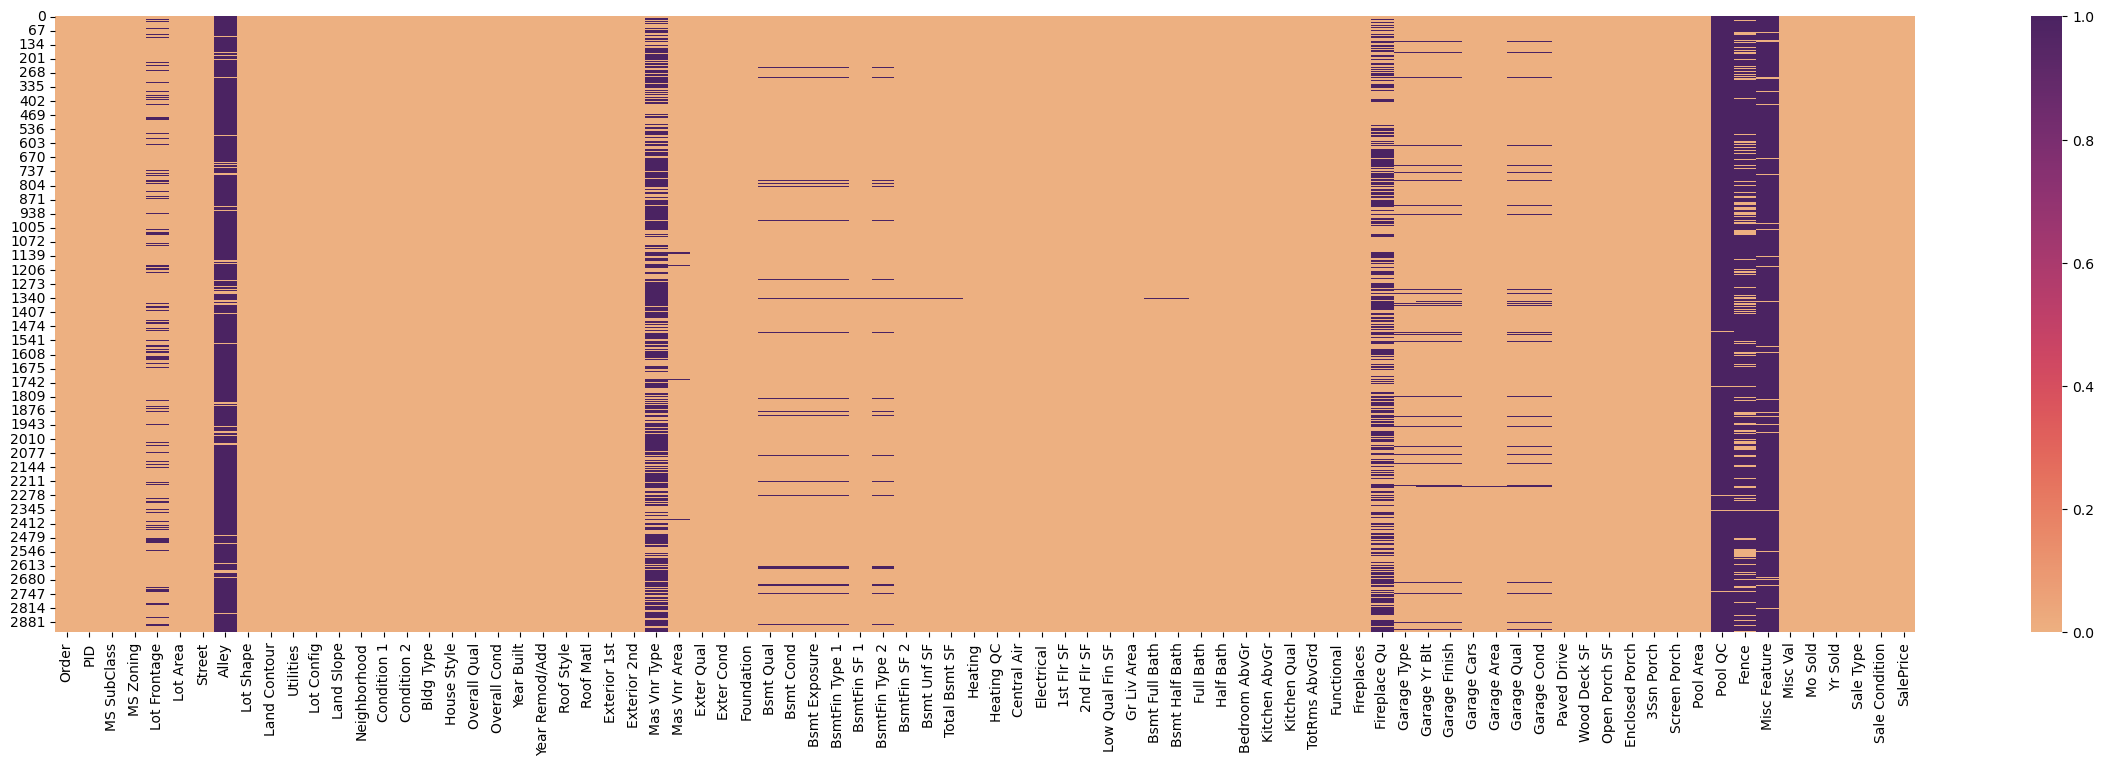

In [6]:
plt.figure(figsize=(30,8))
sb.heatmap(data_raw.isnull(), cmap='flare')
# null count heat map raw data

In [7]:
count = data_raw.isnull().sum().sort_values(ascending=False)
per = (data_raw.isnull().sum() / data_raw.isnull().count()*100).sort_values(ascending=False)
null_data = pd.concat([count, per], axis=1, keys=['Count', 'Percent'])
print(null_data.head(15))

                Count    Percent
Pool QC          2917  99.556314
Misc Feature     2824  96.382253
Alley            2732  93.242321
Fence            2358  80.477816
Mas Vnr Type     1775  60.580205
Fireplace Qu     1422  48.532423
Lot Frontage      490  16.723549
Garage Cond       159   5.426621
Garage Finish     159   5.426621
Garage Yr Blt     159   5.426621
Garage Qual       159   5.426621
Garage Type       157   5.358362
Bsmt Exposure      83   2.832765
BsmtFin Type 2     81   2.764505
Bsmt Qual          80   2.730375


In [8]:
data_cl=data_raw.drop(labels=['Order'], axis=1)#index values not required
data_cl=data_cl.drop(labels=['PID'], axis=1)#identitification values not required
data_cl=data_cl.drop(labels=['Alley'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Fireplace Qu'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Pool QC'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Fence'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Misc Feature'], axis=1)#Too many null values

<Axes: >

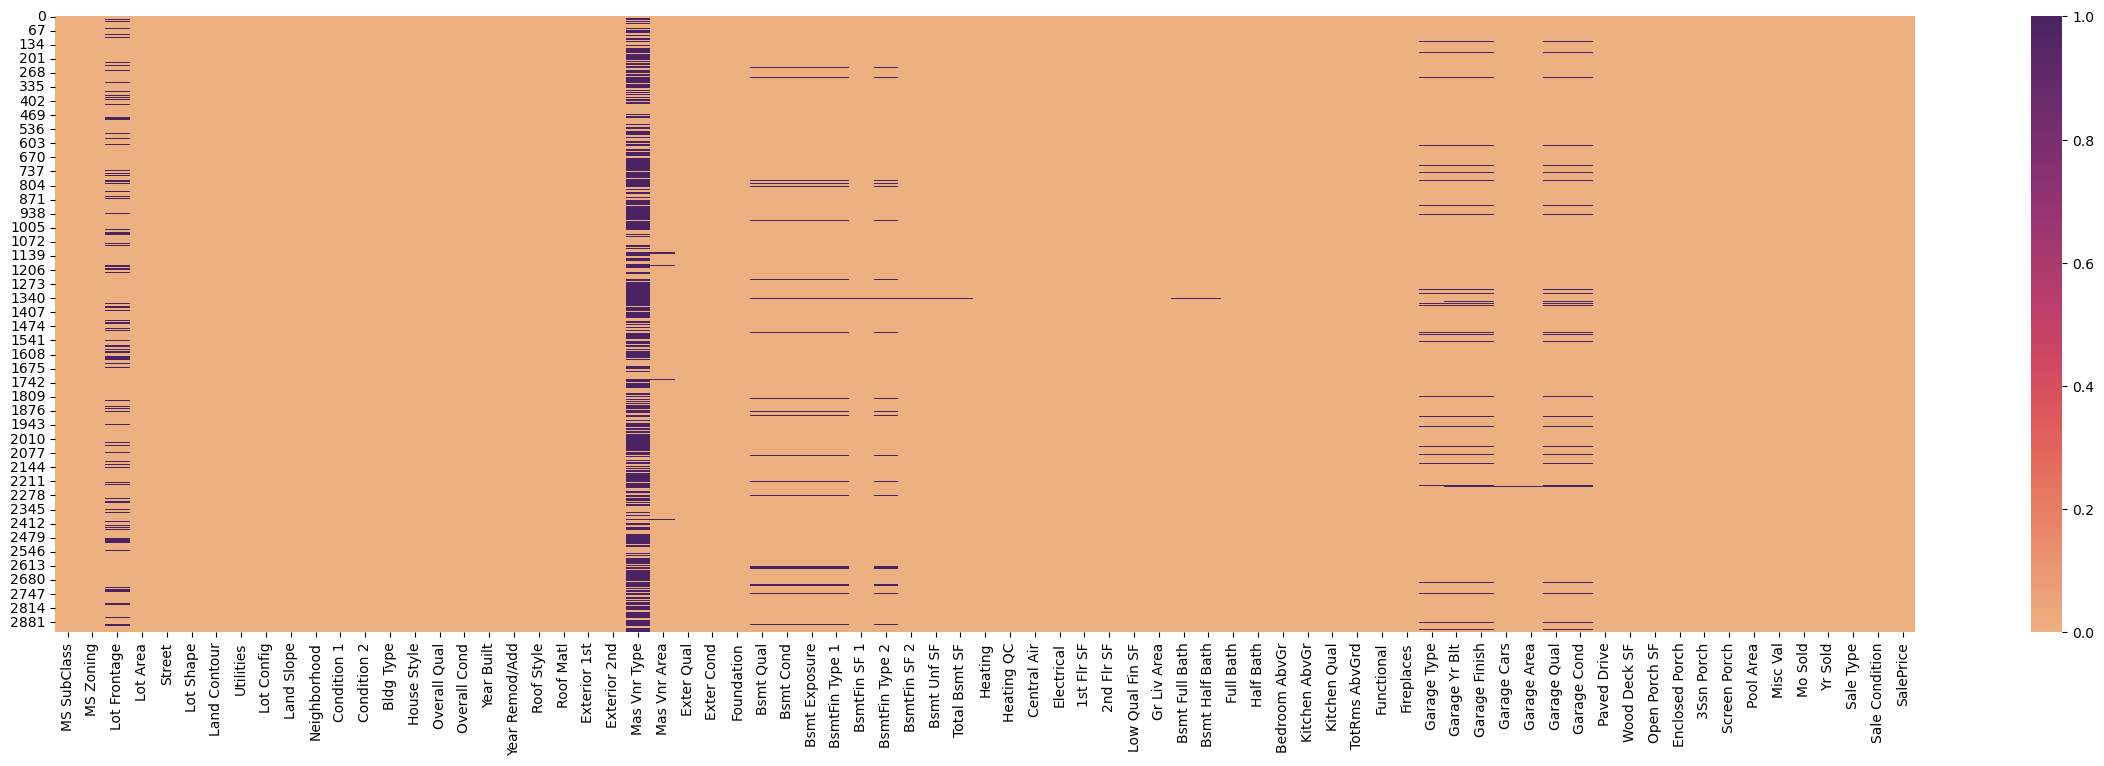

In [9]:
plt.figure(figsize=(30,8))
sb.heatmap(data_cl.isnull(), cmap='flare')
# null count heat map raw data

In [10]:
(data_cl.groupby('Utilities').size()/data_raw['Utilities'].count())*100

Utilities
AllPub    99.897611
NoSeWa     0.034130
NoSewr     0.068259
dtype: float64

In [11]:
data_cl=data_cl.drop(labels=['Utilities'], axis=1)#99% values are same


In [12]:
(data_cl.groupby('Street').size()/data_cl['Street'].count())*100

Street
Grvl     0.409556
Pave    99.590444
dtype: float64

In [13]:
data_cl=data_cl.drop(labels=['Street'], axis=1)#99% values are same


In [14]:
count = data_cl.isnull().sum().sort_values(ascending=False)
per = (data_cl.isnull().sum() / data_cl.isnull().count()*100).sort_values(ascending=False)
null_data = pd.concat([count, per], axis=1, keys=['Count', 'Percent'])
print(null_data.head(10))

                Count    Percent
Mas Vnr Type     1775  60.580205
Lot Frontage      490  16.723549
Garage Cond       159   5.426621
Garage Yr Blt     159   5.426621
Garage Finish     159   5.426621
Garage Qual       159   5.426621
Garage Type       157   5.358362
Bsmt Exposure      83   2.832765
BsmtFin Type 2     81   2.764505
BsmtFin Type 1     80   2.730375


In [15]:
#Filling the numeric data
num_null = ['BsmtFin SF 1',
'BsmtFin SF 2',
'Lot Frontage',
'Bsmt Unf SF',
'Mas Vnr Area',
'Total Bsmt SF',
'Bsmt Full Bath',
'Bsmt Half Bath',
'Garage Area',
'Garage Cars']
for feature in num_null:
    data_cl[feature] = data_cl[feature].fillna(data_cl[feature].mean())


In [16]:
cat_null = ['Exterior 1st',
'Exterior 2nd',
'Sale Type',
'MS Zoning',
'Garage Type',
'Garage Finish',
'Garage Qual',
'Garage Yr Blt',
'Bsmt Exposure',
'Bsmt Half Bath',
'Bsmt Full Bath',
'BsmtFin Type 1',
'Bsmt Cond',
'Bsmt Qual',
'Garage Cond',
'Mas Vnr Type',
'BsmtFin Type 2',
'Electrical',
'Kitchen Qual',
'Functional']
for feature in cat_null:
    data_cl[feature] = data_cl[feature].fillna(data_cl[feature].mode()[0])

In [17]:
count = data_cl.isnull().sum().sort_values(ascending=False)
per = (data_cl.isnull().sum() / data_cl.isnull().count()*100).sort_values(ascending=False)
null_data = pd.concat([count, per], axis=1, keys=['Count', 'Percent'])
print(null_data.head(10))

               Count  Percent
MS SubClass        0      0.0
Central Air        0      0.0
Garage Type        0      0.0
Fireplaces         0      0.0
Functional         0      0.0
TotRms AbvGrd      0      0.0
Kitchen Qual       0      0.0
Kitchen AbvGr      0      0.0
Bedroom AbvGr      0      0.0
Half Bath          0      0.0


<Axes: >

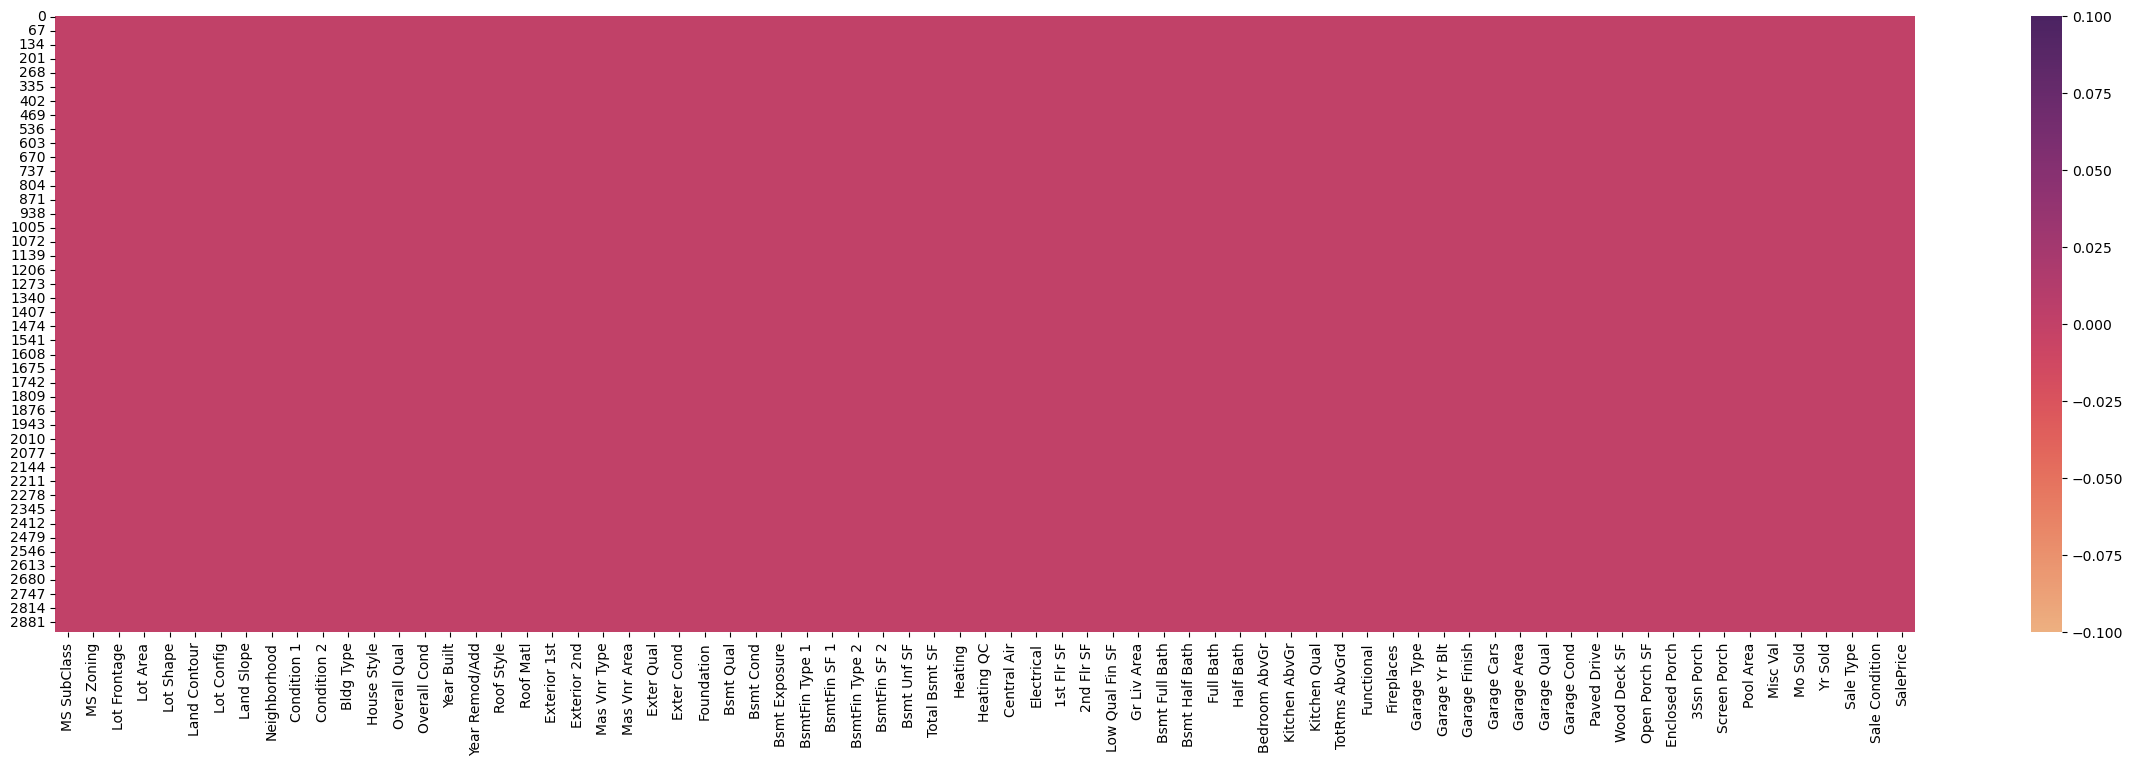

In [18]:
plt.figure(figsize=(30,8))
sb.heatmap(data_cl.isnull(), cmap='flare')
# null count heat map raw data

In [19]:
sales_corr=data_raw[data_raw.columns[1:]].corr(numeric_only=True)['SalePrice'][:-1]
round(sales_corr.sort_values(ascending=False).head(5),2)

Overall Qual     0.80
Gr Liv Area      0.71
Garage Cars      0.65
Garage Area      0.64
Total Bsmt SF    0.63
Name: SalePrice, dtype: float64

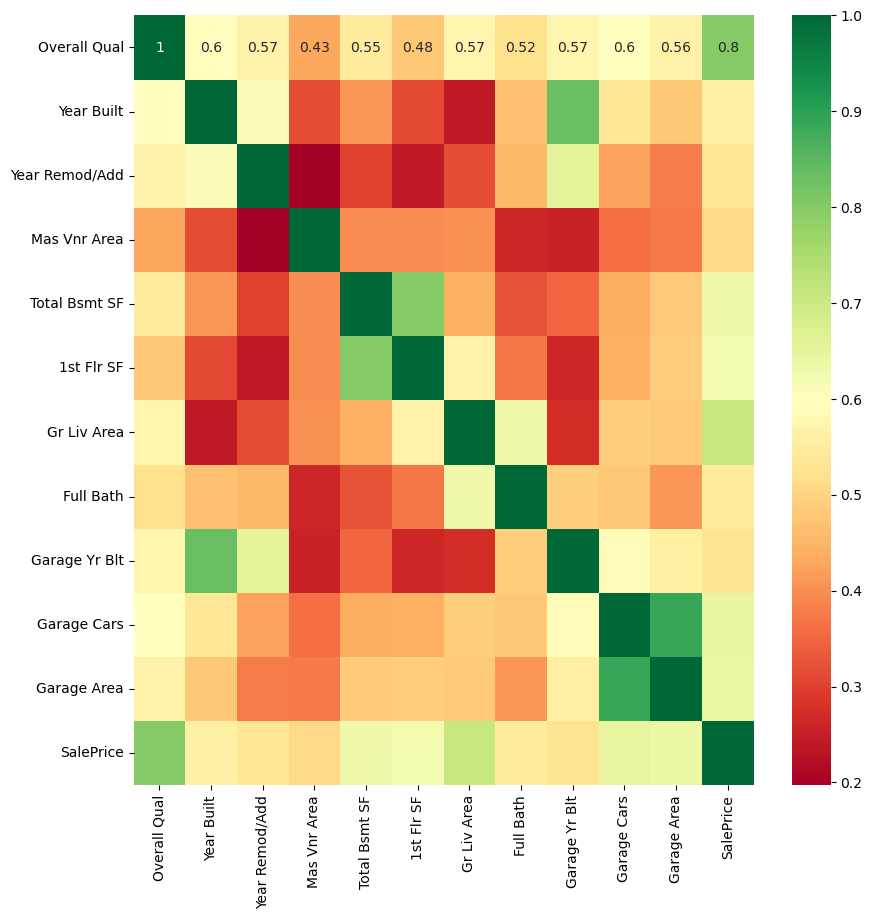

In [20]:
corr = data_raw.corr(numeric_only=True)
highly_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
map = sb.heatmap(data_raw[highly_corr_features].corr(numeric_only=True),annot=True,cmap="RdYlGn")

In [21]:

# Dropping columns having correlation with target variable between -0.01 to 0.01
data_clean=data_cl.drop(labels=['Low Qual Fin SF','Misc Val','Yr Sold','Bsmt Half Bath','BsmtFin SF 2','Overall Cond',\
    'Mo Sold','3Ssn Porch','Pool Area','Screen Porch'], axis=1)

In [22]:
data_clean['built decade']=pd.cut(data_clean['Year Built'],bins=[1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010\
    ],labels=['1870','1880','1890','1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000'])
data_clean=data_clean.drop(labels=['Year Built'], axis=1)# Not Required anymore

In [23]:
data_clean['remodel decade']=pd.cut(data_clean['Year Remod/Add'],bins=[1940,1950,1960,1970,1980,1990,2000,2010],labels=['1940','1950','1960','1970','1980','1990','2000'])
data_clean=data_clean.drop(labels=['Year Remod/Add'], axis=1)# Not Required anymore


In [24]:
data_clean['Garage Yr Blt'].mode()

0    2005.0
Name: Garage Yr Blt, dtype: float64

In [25]:
data_clean['Garage Yr Blt']=data_clean['Garage Yr Blt'].replace(to_replace=2207, value= 2005)#replace outlier with mode
data_clean['Garage Yr Blt'].describe()

count    2930.000000
mean     1979.521502
std        25.217884
min      1895.000000
25%      1962.000000
50%      1983.500000
75%      2003.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [26]:
data_clean['Garage Yr Blt decade']=pd.cut(data_clean['Garage Yr Blt'],bins=[1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010\
    ],labels=['1890','1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000'])
data_clean=data_clean.drop(labels=['Garage Yr Blt'], axis=1)# Not Required anymore

The cheapest house sold for $12,789 and the most expensive for $755,000
The average sales price is $180,796, while median is $160,000


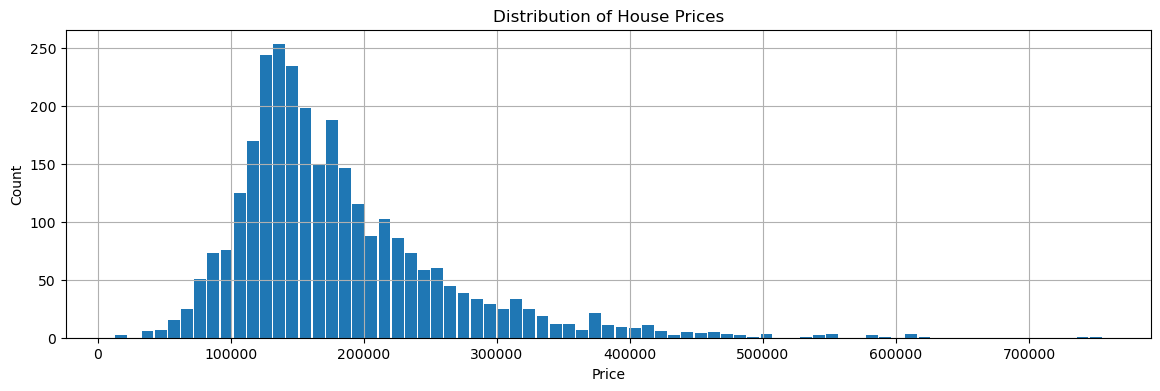

In [27]:

print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    data_clean.SalePrice.min(), data_clean.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    data_clean.SalePrice.mean(), data_clean.SalePrice.median()))
data_clean.SalePrice.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

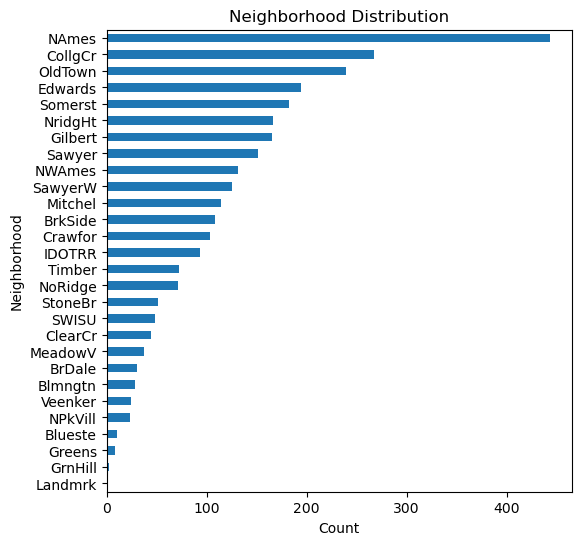

In [28]:
# Where are houses?
data_raw.groupby('Neighborhood').PID.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.title('Neighborhood Distribution')
plt.xlabel('Count')
plt.show()

The average house has 1,500 sq ft of space, the median 1,442 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


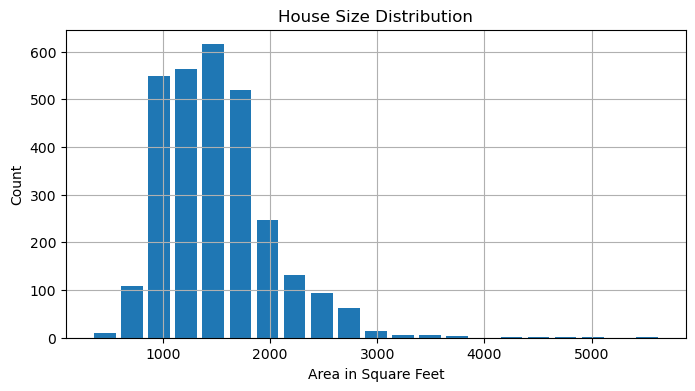

In [29]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    data_raw['Gr Liv Area'].mean(), data_raw['Gr Liv Area'].median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    data_raw['Gr Liv Area'].max(), data_raw['Gr Liv Area'].min()))
data_raw['Gr Liv Area'].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('House Size Distribution')
plt.xlabel('Area in Square Feet')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gr Liv Area', ylabel='Count'>

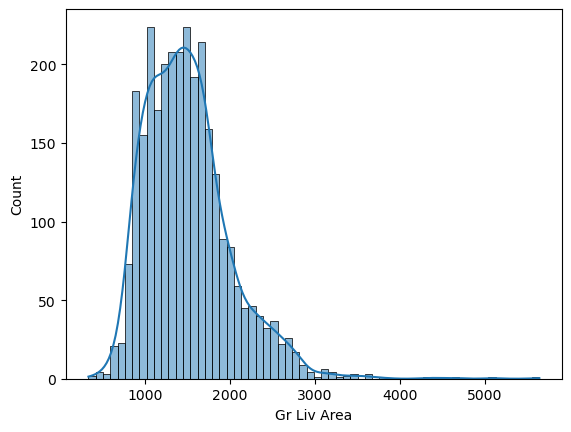

In [30]:

sb.histplot(data=data_raw, x="Gr Liv Area", kde=True)

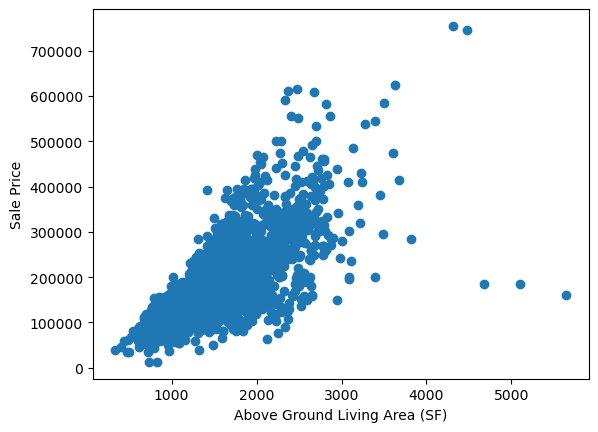

In [31]:
plt.scatter(data_clean['Gr Liv Area'], data_clean['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above Ground Living Area (SF)')
plt.show()

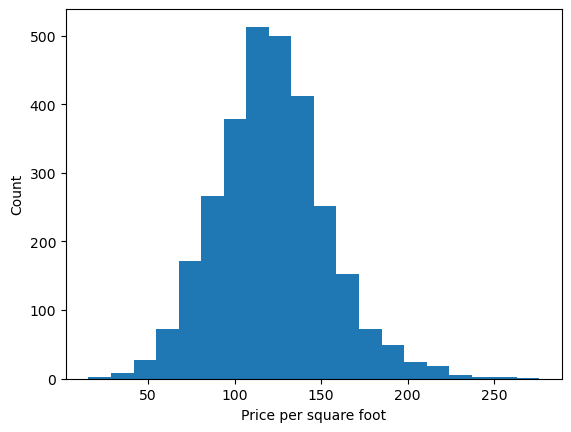

In [32]:
data_raw['PSF'] = data_raw['SalePrice']/data_raw['Gr Liv Area']
plt.hist(data_raw['PSF'], bins=20)
plt.ylabel('Count')
plt.xlabel('Price per square foot')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


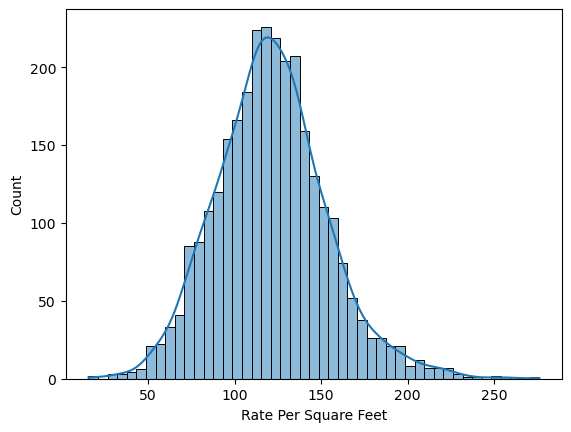

In [33]:

haha=sb.histplot(data=data_raw, x="PSF", kde=True)
haha.set(xlabel='Rate Per Square Feet', ylabel='Count')
plt.show()

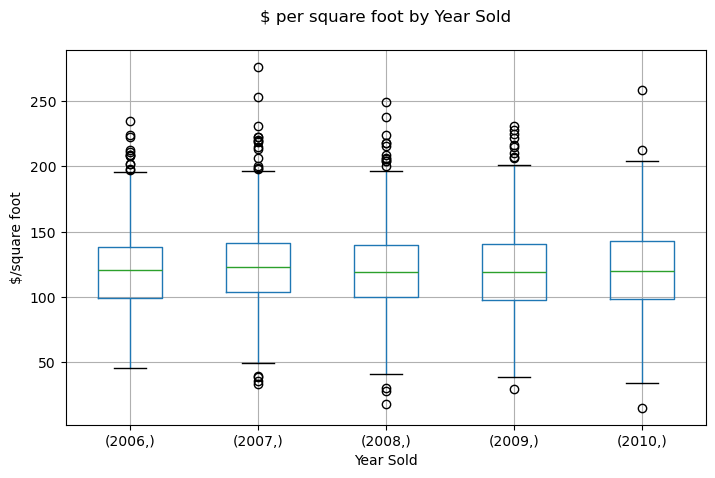

In [34]:
data_raw.boxplot(column=['PSF'], by=['Yr Sold'], figsize=(8,5))
plt.suptitle('$ per square foot by Year Sold')
plt.title('')
plt.ylabel('$/square foot')
plt.xlabel('Year Sold')
plt.show()

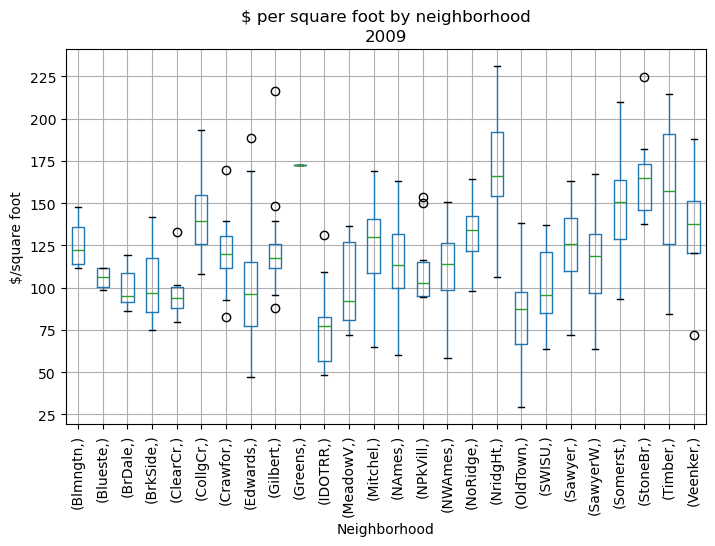

In [35]:
data_raw[data_raw["Yr Sold"]== 2009].boxplot(column=['PSF'], by=['Neighborhood'], figsize=(8,5), rot=90)
plt.suptitle('$ per square foot by neighborhood')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Neighborhood')
plt.show()


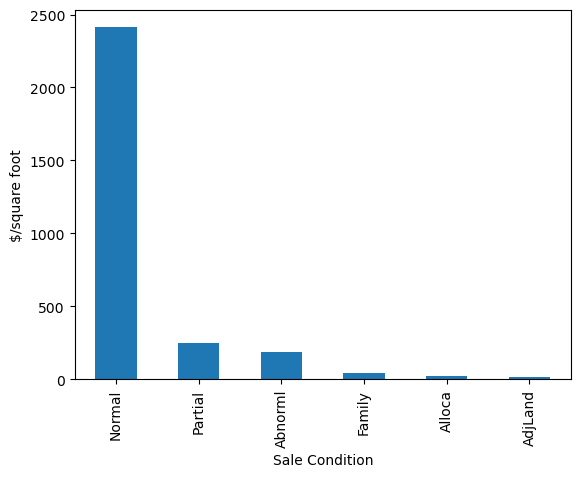

In [36]:
data_raw['Sale Condition'].value_counts().plot(kind='bar')
plt.ylabel('$/square foot')
plt.xlabel('Sale Condition')
plt.show()